In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score


# Import cross_val_score
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore', category=Warning)


In [3]:
df = pd.read_csv("heart.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)


(1025, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [139]:
# Let's check the top 5 rows of our dataframe
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.target.value_counts()


1    526
0    499
Name: target, dtype: int64

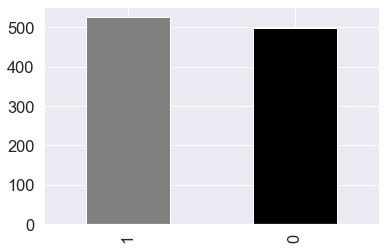

In [8]:
df.target.value_counts().plot(kind="bar", color=["grey", "black"]);

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [121]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.sex.value_counts()


1    713
0    312
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target, df.sex)


sex,0,1
target,,
0,86,413
1,226,300


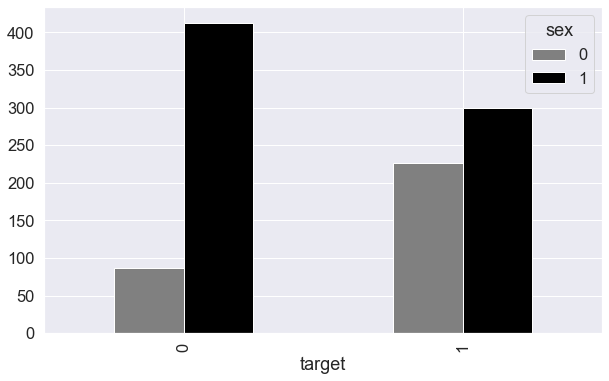

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["grey", "black"]);


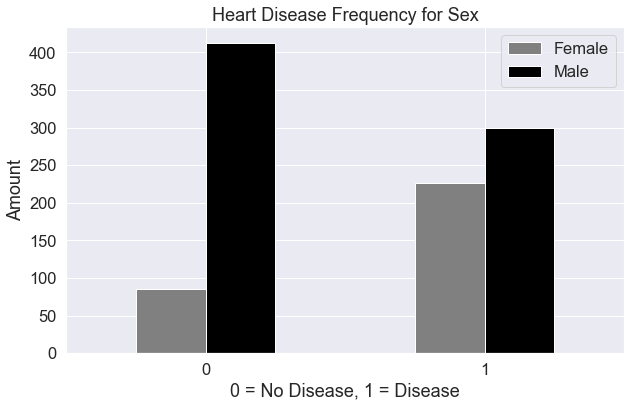

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["grey", "black"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical


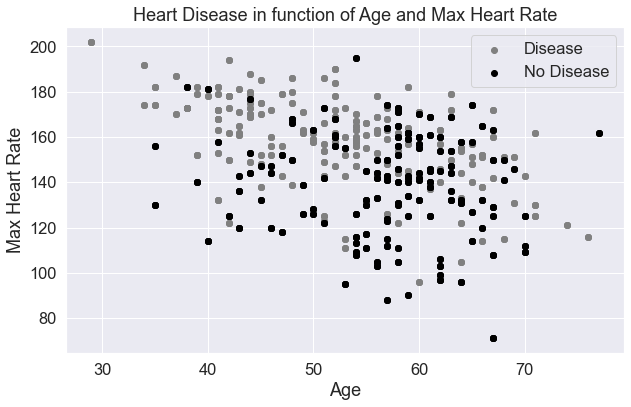

In [15]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="grey") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="black") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");


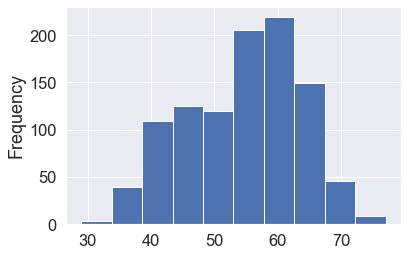

In [16]:
df.age.plot.hist();


In [17]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


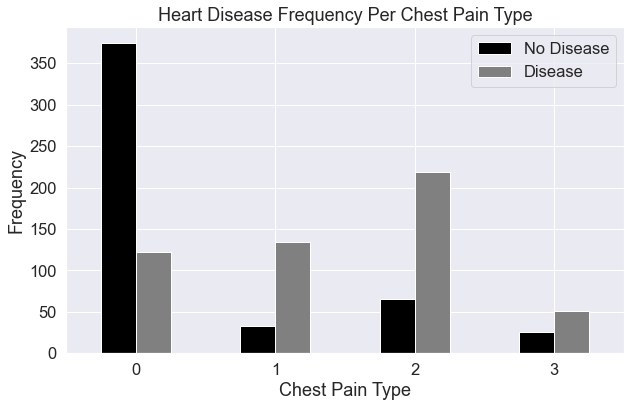

In [18]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["black", "grey"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);


In [19]:
corr_matrix = df.corr()
corr_matrix 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


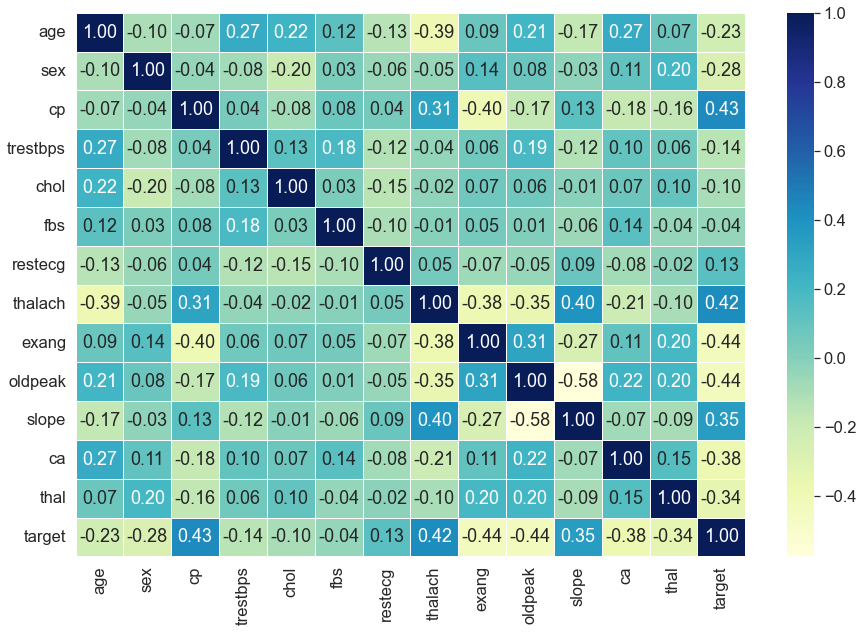

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");


In [21]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values


In [23]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape,X_test.shape


((820, 13), (205, 13))

In [26]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set


In [27]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [28]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [29]:
y_train, len(y_train)


(array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 

In [30]:
y_test, len(y_test)

(array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0], dtype=int64),
 205)

In [31]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,86,226
1,413,300


In [32]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


In [33]:

# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [34]:
# Train and test SVM model
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
tn_svm, fp_svm, fn_svm, tp_svm = svm_cm.ravel()
svm_specificity = tn_svm / (tn_svm + fp_svm)



In [35]:
# Train and test LGB model
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'feature_fraction': 0.8
}

lgb_model = lgb.train(params, lgb_train, num_boost_round=100)
lgb_pred = np.round(lgb_model.predict(X_test))
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1_score = f1_score(y_test, lgb_pred)
lgb_cm = confusion_matrix(y_test, lgb_pred)
tn_lgb, fp_lgb, fn_lgb, tp_lgb = lgb_cm.ravel()
lgb_specificity = tn_lgb / (tn_lgb + fp_lgb)

[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515854 -> initscore=0.063436
[LightGBM] [Info] Start training from score 0.063436


In [36]:
xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1_score = f1_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)
tn_xgb, fp_xgb, fn_xgb, tp_xgb = xgb_cm.ravel()
xgb_specificity = tn_xgb / (tn_xgb + fp_xgb)

In [37]:
svm_clf = SVC(kernel='linear', probability=True)
lgb_clf = LGBMClassifier()
xgb_clf = XGBClassifier()
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('lgb', lgb_clf), ('xgb', xgb_clf)], voting='soft')
# Create the voting classifier
vc_model = VotingClassifier(estimators=[('svm', svm), ('lgb', lgb), ('xgb', xgb)], voting='soft')
# Create the SVM classifier
svm = SVC(kernel='linear', probability=True)
# Create the LGBM classifier
lgb = LGBMClassifier()
# Create the XGB classifier
xgb = XGBClassifier()
# Create the voting classifier
vc_model = VotingClassifier(estimators=[('svm', svm), ('lgb', lgb), ('xgb', xgb)], voting='soft')
vc_model.fit(X_train, y_train)

# Make predictions on the testing data
vc_pred = vc_model.predict(X_test)

In [38]:
# Calculate evaluation metrics
vc_accuracy = accuracy_score(y_test, vc_pred)
vc_precision = precision_score(y_test, vc_pred)
vc_recall = recall_score(y_test, vc_pred)
vc_f1_score = f1_score(y_test, vc_pred)
vc_cm = confusion_matrix(y_test, vc_pred)
tn_vc, fp_vc, fn_vc, tp_vc = vc_cm.ravel()
vc_specificity = tn_vc / (tn_vc + fp_vc)


In [39]:
print('SVM Evaluation Metrics:')
print(f'Accuracy: {svm_accuracy:.3f}')
print(f'Precision: {svm_precision:.3f}')
print(f'Recall: {svm_recall:.3f}')
print(f'F1-score: {svm_f1_score:.3f}')
print(f'Specificity: {svm_specificity:.3f}')
print('\n')

SVM Evaluation Metrics:
Accuracy: 0.815
Precision: 0.760
Recall: 0.922
F1-score: 0.833
Specificity: 0.706




In [40]:
print('LGB Evaluation Metrics:')
print(f'Accuracy: {lgb_accuracy:.3f}')
print(f'Precision: {lgb_precision:.3f}')
print(f'Recall: {lgb_recall:.3f}')
print(f'F1-score: {lgb_f1_score:.3f}')
print(f'Specificity: {lgb_specificity:.3f}')
print('\n')

LGB Evaluation Metrics:
Accuracy: 0.951
Precision: 0.960
Recall: 0.942
F1-score: 0.951
Specificity: 0.961




In [41]:
print('XGB Evaluation Metrics:')
print(f'Accuracy: {xgb_accuracy:.3f}')
print(f'Precision: {xgb_precision:.3f}')
print(f'Recall: {xgb_recall:.3f}')
print(f'F1-score: {xgb_f1_score:.3f}')
print(f'Specificity: {xgb_specificity:.3f}')
print('\n')

XGB Evaluation Metrics:
Accuracy: 0.946
Precision: 0.960
Recall: 0.932
F1-score: 0.946
Specificity: 0.961




In [42]:
# Print the evaluation metrics
print("Voting Classifier:")
print(f'Accuracy: {vc_accuracy:.3f}')
print(f'Precision: {vc_precision:.3f}')
print(f'Recall: {vc_recall:.3f}')
print(f'F1-score: {vc_f1_score:.3f}')
print(f'Specificity: {vc_specificity:.3f}')
print('\n')

Voting Classifier:
Accuracy: 0.985
Precision: 1.000
Recall: 0.971
F1-score: 0.985
Specificity: 1.000




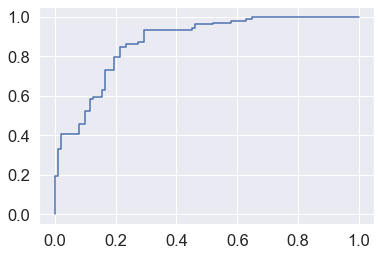

In [43]:
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
svm_roc_auc = auc(svm_fpr, svm_tpr)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_roc_auc)

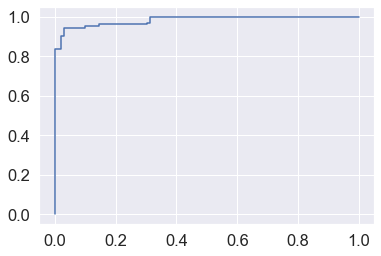

In [44]:
lgb_fpr, lgb_tpr, lgb_thresholds = roc_curve(y_test, lgb_model.predict(X_test))
lgb_roc_auc = auc(lgb_fpr, lgb_tpr)
plt.plot(lgb_fpr, lgb_tpr, label='LGB (AUC = %0.2f)' % lgb_roc_auc)

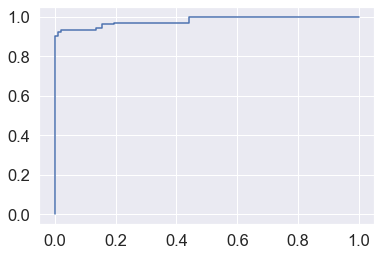

In [45]:
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
plt.plot(xgb_fpr, xgb_tpr, label='XGB (AUC = %0.2f)' % xgb_roc_auc)

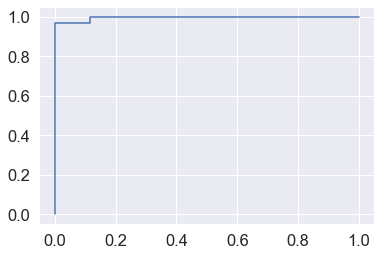

In [46]:
vc_fpr, vc_tpr, vc_thresholds = roc_curve(y_test, vc_model.predict_proba(X_test)[:,1])
vc_roc_auc = auc(vc_fpr, vc_tpr)
plt.plot(vc_fpr, vc_tpr, label='VC (AUC = %0.2f)' % vc_roc_auc)

In [47]:
import matplotlib.pyplot as plt

models = ['SVM', 'LGB', 'XGB', 'VC']
accuracies = [svm_accuracy, lgb_accuracy, xgb_accuracy, vc_accuracy]
precisions = [svm_precision, lgb_precision, xgb_precision, vc_precision]
recalls = [svm_recall, lgb_recall, xgb_recall, vc_recall]
f1_scores = [svm_f1_score, lgb_f1_score, xgb_f1_score, vc_f1_score]
specificities = [svm_specificity, lgb_specificity, xgb_specificity, vc_specificity]

x = [i for i, _ in enumerate(models)]



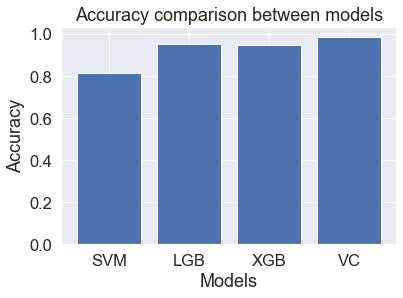

In [48]:
# Plot accuracy bar graph
plt.bar(x, accuracies, color='b')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison between models")
plt.xticks(x, models)
plt.show()



In [49]:
metrics_df = pd.DataFrame({'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls, 'F1-score': f1_scores, 'Specificity': specificities}, index=models)

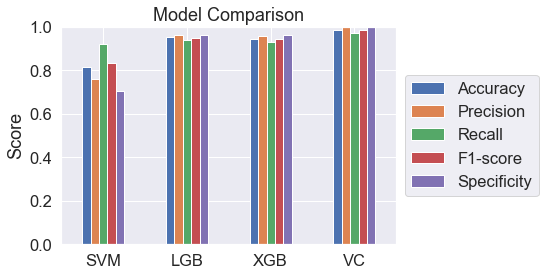

In [50]:

metrics_df.plot(kind='bar', rot=0)
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [51]:
plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

Text(25.5, 0.5, 'True Labels')

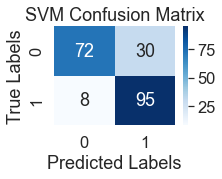

In [52]:
plt.subplot(221)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Text(208.11818181818177, 0.5, 'True Labels')

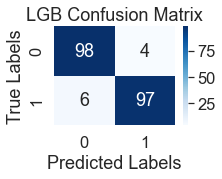

In [53]:
plt.subplot(222)
sns.heatmap(lgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('LGB Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Text(25.5, 0.5, 'True Labels')

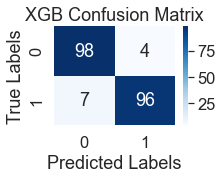

In [54]:
plt.subplot(223)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGB Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Text(208.11818181818177, 0.5, 'True Labels')

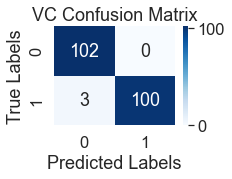

In [55]:
plt.subplot(224)
sns.heatmap(vc_cm, annot=True, fmt='d', cmap='Blues')
plt.title('VC Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [56]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

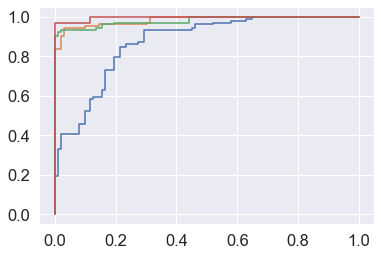

In [57]:
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(lgb_fpr, lgb_tpr, label='LGB')
plt.plot(xgb_fpr, xgb_tpr, label='XGB')
plt.plot(vc_fpr, vc_tpr, label='VC')

In [58]:
from lightgbm import LGBMClassifier
import pickle

In [59]:
lgb = LGBMClassifier()
lgb.fit(X,y)

LGBMClassifier()

In [60]:
X=df.drop('target',axis=1)
y=df['target']


In [61]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

new_data

p = lgb.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [62]:
import joblib

In [63]:
joblib.dump(lgb,'model_joblib_heart')

['model_joblib_heart']

In [64]:
model = joblib.load('model_joblib_heart')

In [65]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [141]:
from tkinter import *
import joblib
from sklearn import *
from PIL import Image, ImageTk
from tkinter import messagebox
import tkinter.ttk
from tkinter import Button, Label, Entry
import tkinter as tk

In [142]:

def show_entry_fields():
    # Get the values from the entry fields
    p1 = e1.get()
    p2 = e2.get()
    p3 = e3.get()
    p4 = e4.get()
    p5 = e5.get()
    p6 = e6.get()
    p7 = e7.get()
    p8 = e8.get()
    p9 = e9.get()
    p10 = e10.get()
    p11 = e11.get()
    p12 = e12.get()
    p13 = e13.get()

    # Validate the input
    if not all([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]):
        messagebox.showerror("Error", "Please fill in all the fields.")
        return
    if not p1.isdigit() or int(p1) < 20 or int(p1) > 80:
        messagebox.showerror("Error", "Please enter a valid age between 20 and 80.")
        return
    if p2 not in ["0", "1"]:
        messagebox.showerror("Error", "Please enter valid values for sex: 0 for Female and 1 for Male")
        return
    if p3 not in ["0", "1" , "2" , "3"]:
        messagebox.showerror("Error", "Please enter valid values for Chest pain: 0 to 3 ")
        return

    if p6 not in ["0", "1"]:
        messagebox.showerror("Error", "Please enter valid values for Fasting Blood Sugar: 0 or 1")
        return
    if p7 not in ["0", "1" , "2"]:
        messagebox.showerror("Error", "Please enter valid values for resting electrocardiographic results: 0 to 2")
        return
    if p9 not in ["0", "1"]:
        messagebox.showerror("Error", "Please enter valid values for Exercise Induced Angina: 0 or 1")
        return
    if p11 not in ["0", "1" , "2"]:
        messagebox.showerror("Error", "Please enter valid values for slope of the peak exercise ST segment: 0 to 2")
        return
    if not p12.isdigit() or int(p12) < 0 or int(p12) > 7:
        messagebox.showerror("Error", "Please enter a valid value for number of major vessels colored by flourosopy  between 0 to 3")
        return
    if p13 not in ["1" , "2" , "3" , "4" , "5" , "6" , "7"]:
        messagebox.showerror("Error", "Please enter valid values for thalium stress result: 1 to 7")
        return
    
    try:
        # Convert the input to the correct types
        p1 = int(p1)
        p2 = int(p2)
        p3 = int(p3)
        p4 = int(p4)
        p5 = int(p5)
        p6 = int(p6)
        p7 = int(p7)
        p8 = int(p8)
        p9 = int(p9)
        p10 = float(p10)
        p11 = int(p11)
        p12 = int(p12)
        p13 = int(p13)
    except ValueError:
        messagebox.showerror("Error", "Please enter valid values for all fields.")
        return

    # Load the model and make the prediction
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p8, p10, p11, p12, p13]])

       # Remove the old result label if it exists
    if 'result_label' in globals():
        result_label.destroy()

    # Create a new label for the result and place it in the appropriate row and column
    result_label = Label(master, font=("Arial", 12))
    result_label.grid(row=14, column=1, padx=10, pady=5, sticky=W)
    
    # Display the result
    if result == 0:
        messagebox.showinfo("Result", "No Heart Disease")
    else:
        messagebox.showinfo("Result", "Having Heart Disease")


In [143]:

# Create window
master = Tk()
master.title("Heart Disease Detection System")


''

In [144]:

# Set up the background image
bg_image = Image.open("WhatsApp Image 2023-04-28 at 22.28.54.jpg")
bg_photo = ImageTk.PhotoImage(bg_image)
bg_label = Label(master, image=bg_photo)
bg_label.place(x=400, y=0, relwidth=0.6, relheight=1)



In [145]:

# Create labels and input fields
Label(master, text = "Heart Disease Detection System", bg="red", fg="white", font=("Arial", 20, "bold")).grid(row=0,columnspan=2, pady=10)

Label(master, text="Enter Your Age:", font=("Arial", 12)).grid(row=1, padx=10, pady=5, sticky=W)
Label(master, text="Male or Female [1/0]:", font=("Arial", 12)).grid(row=2, padx=10, pady=5, sticky=W)
Label(master, text="Chest Pain Type[0-3]:", font=("Arial", 12)).grid(row=3, padx=10, pady=5, sticky=W)
Label(master, text="Resting Blood Pressure:", font=("Arial", 12)).grid(row=4, padx=10, pady=5, sticky=W)
Label(master, text="Cholesterol Level:", font=("Arial", 12)).grid(row=5, padx=10, pady=5, sticky=W)
Label(master, text="Fasting Blood Sugar > 120 mg/dl [1/0]:", font=("Arial", 12)).grid(row=6, padx=10, pady=5, sticky=W)
Label(master, text="Resting Electrocardiographic Results[0-2]:", font=("Arial", 12)).grid(row=7, padx=10, pady=5, sticky=W)
Label(master, text="Maximum Heart Rate Achieved:", font=("Arial", 12)).grid(row=8, padx=10, pady=5, sticky=W)
Label(master, text="Exercise Induced Angina [1/0]:", font=("Arial", 12)).grid(row=9, padx=10, pady=5, sticky=W)
Label(master, text="ST Depression Induced by Exercise Relative to Rest:", font=("Arial", 12)).grid(row=10, padx=10, pady=5, sticky=W)
Label(master, text="Slope of the Peak Exercise ST Segment[0-2]:", font=("Arial", 12)).grid(row=11, padx=10, pady=5, sticky=W)
Label(master, text="Number of Major Vessels Colored by Flouroscopy[0-3]:", font=("Arial", 12)).grid(row=12, padx=10, pady=5, sticky=W)
Label(master, text="Thalassemia[1-7]:", font=("Arial", 12)).grid(row=13, padx=10, pady=5, sticky=W)


In [146]:

e1 = Entry(master, width= 25, font=("Arial", 14))
e2 = Entry(master, width=25, font=("Arial", 14))
e3 = Entry(master, width=25, font=("Arial", 14))
e4 = Entry(master, width=25, font=("Arial", 14))
e5 = Entry(master, width=25, font=("Arial", 14))
e6 = Entry(master, width=25, font=("Arial", 14))
e7 = Entry(master, width=25, font=("Arial", 14))
e8 = Entry(master, width=25, font=("Arial", 14))
e9 = Entry(master, width=25, font=("Arial", 14))
e10 = Entry(master, width=25, font=("Arial", 14))
e11 = Entry(master, width=25, font=("Arial", 14))
e12 = Entry(master, width=25, font=("Arial", 14))
e13 = Entry(master, width=25, font=("Arial", 14))


In [147]:
e1.grid(row=1, column=1)
e2.grid(row=2, column=1) 
e3.grid(row=3, column=1) 
e4.grid(row=4, column=1) 
e5.grid(row=5, column=1) 
e6.grid(row=6, column=1) 
e7.grid(row=7, column=1) 
e8.grid(row=8, column=1) 
e9.grid(row=9, column=1) 
e10.grid(row=10, column=1) 
e11.grid(row=11, column=1) 
e12.grid(row=12, column=1) 
e13.grid(row=13, column=1)

In [148]:
Button(master, text='Detect', command=show_entry_fields, bg="green", fg="white",
font=("Arial", 14), width=20).grid(row=14, columnspan=2, pady=20)

In [ ]:
mainloop()